Eric Nguyen

2019-01-30

Pg. 387

In [1]:
using Calculus, Plots, Polynomials, Roots

# Extended Technology Applicication

## *The Business of Motion-Picture Box-Office Revenue*

It is possible to use a logistic growth equation to predict the total U.S. box-office revenue of a motion picture.

### Exercises

Consider the following data on a movie for Exercises 1&ndash;5.

<table>
    <tr colspan="3">
        <th>MOVIE REVENUE: <i>CRASH</i><br>WEEK 1 = MAY 6, 2005</th>
    </tr>
</table>

| WEEK IN RELEASE, *t* | GROSS REVENUE, *G* (in millions, current week) | TOTAL REVENUE, *R* (in millions) |
| ---: | ---: | ---: |
| 1 | \$ 9.11 | $ 9.11 |
| 2 | 10.50 | 19.61 |
| 3 | 8.04 | 27.65 |
| 4 | 8.55 | 36.20 |
| 5 | 4.73 | 40.93 |
| 6 | 3.37 | 44.30 |
| 7 | 2.12 | 46.42 |
| 8 | 1.78 | 48.20 |
| 9 | 1.49 | 49.69 |

(*Source*: www.boxofficereport.com.)

In [2]:
# Crash data
data = [
    1 9.11  9.11;
    2 10.50 19.61;
    3 8.04  27.65;
    4 8.55  36.20;
    5 4.73  40.93;
    6 3.37  44.30;
    7 2.12  46.42;
    8 1.78  48.20;
    9 1.49  49.69;
]
t, G, R = data[:,1], data[:,2], data[:,3]
data

9×3 Array{Float64,2}:
 1.0   9.11   9.11
 2.0  10.5   19.61
 3.0   8.04  27.65
 4.0   8.55  36.2 
 5.0   4.73  40.93
 6.0   3.37  44.3 
 7.0   2.12  46.42
 8.0   1.78  48.2 
 9.0   1.49  49.69

1. Make a scatterplot of the data points $(t, R)$. Does it seem to fit a logistic equation? Why or why not?

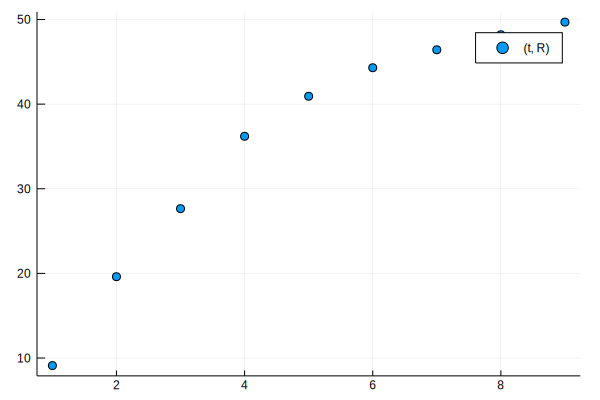

In [3]:
scatter(t, R, label = "(t, R)")

**Solution 1.** It does seem to fit a logistic equation, just based on what logistic equations look like:

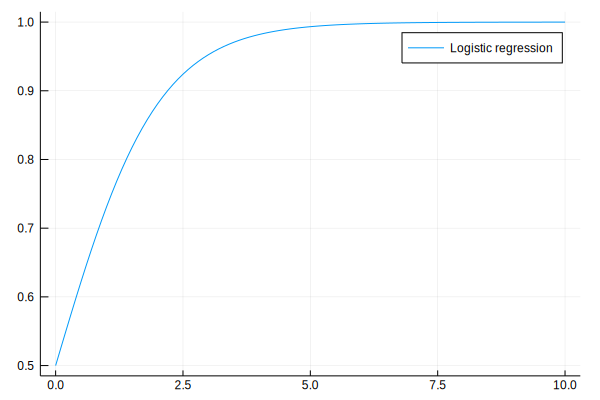

In [4]:
plot(0:0.1:10, x -> 1 / (1 + exp(-x)), label = "Logistic equation")

2. Use REGRESSION to fit a logistic function,

$\quad R(t) = \dfrac{c}{1 + ae^{-bt}},$

to the data.

In [5]:
a = 7.51160669
b = 0.7542644979
c = 48.85150237

Logistic(x) = @. c / (1 + a * exp(-b * x))

logisticreg (generic function with 1 method)

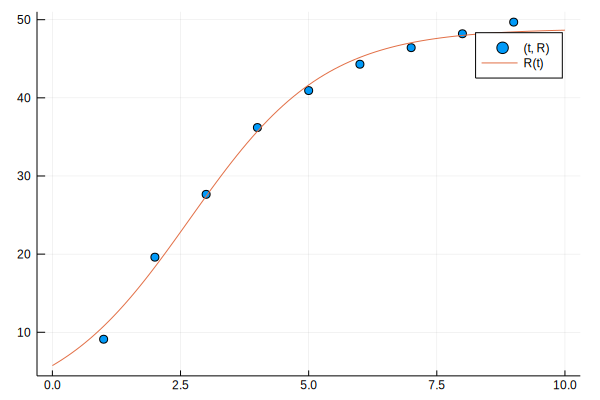

In [6]:
scatter(t, R, label = "(t, R)")
plot!(0:0.1:10, Logistic, label = "R(t)")

**Solution 2.** $\quad R(t) = \dfrac{48.85150237}{1 + 7.51160669e^{-0.7542644979t}}$

3. Find the rate of change $R'(t)$, and explain its meaning. Find $\underset{t \to \infty}{\lim} R'(t)$, and explain its meaning.

**Solution 3.**

$$\begin{align}
R'(t) &= \dfrac{0 - 48.85150237 \left(\frac{d}{dt} 1 + 7.51160669e^{-0.7542644979t}\right)}{\left(1 + 7.51160669e^{-0.7542644979t}\right)^2} \\
&= \dfrac{- 48.85150237 \cdot 7.51160669 \left(-0.7542644979 \cdot e^{-0.7542644979t}\right)}{\left(1 + 7.51160669e^{-0.7542644979t}\right)^2} \\
&= \dfrac{276.77982547220546e^{-0.7542644979t}}{\left(1 + 7.51160669e^{-0.7542644979t}\right)^2} \\
\underset{t \to \infty}{\lim} R'(t) &= \dfrac{276.77982547220546e^{-0.7542644979(\infty)}}{\left(1 + 7.51160669e^{-0.7542644979(\infty)}\right)^2} \\
&= 0
\end{align}$$

The rate of change, $R'(t)$, describes how the total revenue changes over time. In this case, $\underset{t \to \infty}{R'(t)} = 0$, showing us that the total revenue eventually 

**Verifying solution 3.**

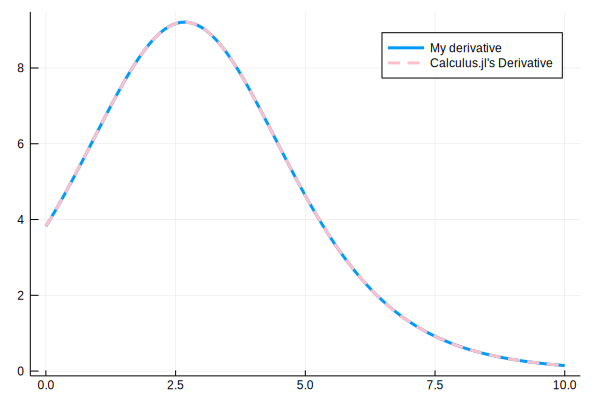

In [7]:
dR(t) = (276.77982547220546 * exp(-0.7542644979t)) / (1 + 7.51160669 * exp(-0.7542644979t))^2 
plot(0:0.1:10, dR
    , lw = 3
    , label = "My derivative"
)
plot!(0:0.1:10, derivative(logistic)
    , lw = 3
    , line = :dash
    , color = "pink"
    , label = "Calculus.jl's Derivative"
)

In [8]:
dR(Inf)

0.0

**Successfully verified solution 3.** The computer's results seem to align with my solution to problem 3!

4. Make a scatterplot of the data points $(t, G)$. Select a model for regression that you think best fits the data, and make a case for why you have chosen it. Find the domain of the function.

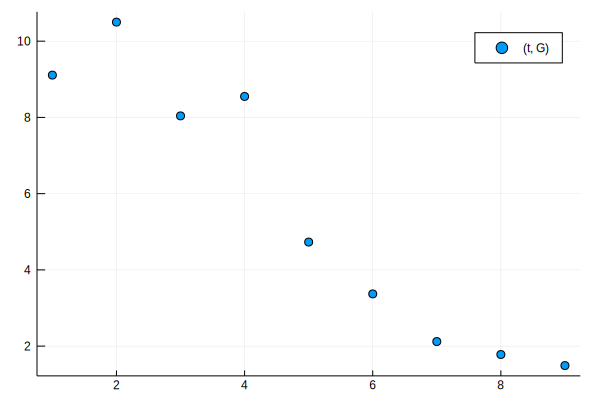

In [9]:
scatter(t, G, label = "(t, G)")

Linear regression sum of squared residuals: 501.1982926698627
Logistic regression sum of squared residuals: 488.9414212935724


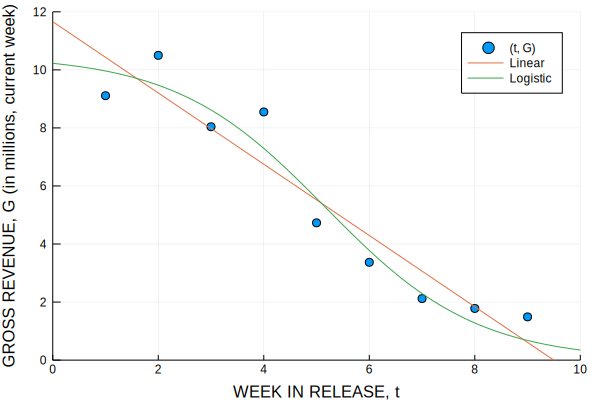

In [10]:
scatter(t, G, label = "(t, G)")

xs = 0:0.1:10

# Linear Regression
LinReg = polyfit(t, G, 1)
plot!(xs, LinReg(xs), label = "Linear")

# Logistic Regression
a = 0.0268069734
b = -0.6991641237
c = 10.49901435
Logistic(x) = @. c / (1 + a * exp(-b * x))
println("Linear regression sum of squared residuals: ", sum((LinReg(G) - G).^2))
println("Logistic regression sum of squared residuals: ", sum((Logistic(G) - G).^2))
plot!(xs, logistic
    , ylim = (0, 12)
    , label = "Logistic"
    , xlim = (0, 10)
    , xlabel = "WEEK IN RELEASE, t"
    , ylabel = "GROSS REVENUE, G (in millions, current week)"
)

**Solution 4.** I would select the logistic regression model, based on the path the data points seem to follow and the sum of the squared residuals is less than that of the linear regression model. The domain of the function would be $(-\infty, \infty)$.

5. Typically, the distributors of a movie wait until its weekly U.S. box-office revenue is 0 before it begins home video sales. Use the function found in Exercise 4 to predict when the distributor should begin home video sales. Why might you wait longer than the predicted time to begin such sales?

In [11]:
find_zero(Logistic, 3)

46.54644853415914

**Solution 5.** Using the logistic function found in Exercise 4, my prediction of when the distributor should begin home video sales is roughly 46.5 weeks. One might wait longer than the predicted time to begin such sales to further maximize profits.

---
Now Let's consider data on another movie for Exercises 6-10


<table>
    <tr colspan="3">
        <th>MOVIE REVENUE: <i>STAR WARS, EPISODE III&mdash;REVENGE OF THE SITH</i><br>WEEK 1 = MAY 20, 2005</th>
    </tr>
</table>

| WEEK IN RELEASE, *t* | GROSS REVENUE, *G* (in millions, current week) | TOTAL REVENUE, *R* (in millions) |
| ---: | ---: | ---: |
| 1 | \$158.45 | $158.45 |
| 2 | 112.04 | 270.49 |
| 3 |  37.40 | 307.89 |
| 4 |  24.22 | 332.11 |
| 5 |  16.03 | 348.14 |
| 6 |  10.33 | 358.47 |
| 7 |   8.03 | 366.50 |
| 8 |   4.32 | 370.82 |
| 9 |   3.11 | 373.93 |

(*Source*: www.boxofficereport.com.)

In [12]:
# Star Wars data
data = [
    1 158.45 158.45
    2 112.04 270.49
    3 37.40  307.89
    4 24.22  332.11
    5 16.03  348.14
    6 10.33  358.47
    7 8.03   366.50
    8 4.32   370.82
    9 3.11   373.93
]
t, G, R = data[:,1], data[:,2], data[:,3]

([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0], [158.45, 112.04, 37.4, 24.22, 16.03, 10.33, 8.03, 4.32, 3.11], [158.45, 270.49, 307.89, 332.11, 348.14, 358.47, 366.5, 370.82, 373.93])

6. Make a scatterplot of the data points $(t, R)$. Does it seem to fit a logistic equation? Why or why not?

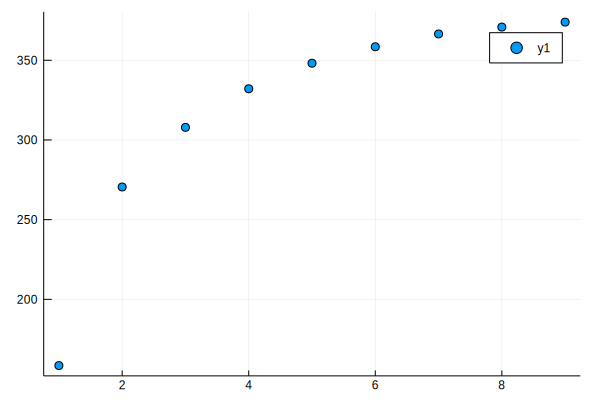

In [13]:
scatter(t, R, label = "(t, R)")

**Solution 6.** It does seem to fit a logistic equation, again simply because of how it looks.

7. Use REGRESSION to fit a logistic function,

$\quad R(t) = \frac{c}{1 + ae^{-bt}},$

to the data.

In [14]:
a = 3.094470652
b = 0.9704199845
c = 365.0855422
Logistic(x) = @. c / (1 + a * exp(-b * x))

logisticreg (generic function with 1 method)

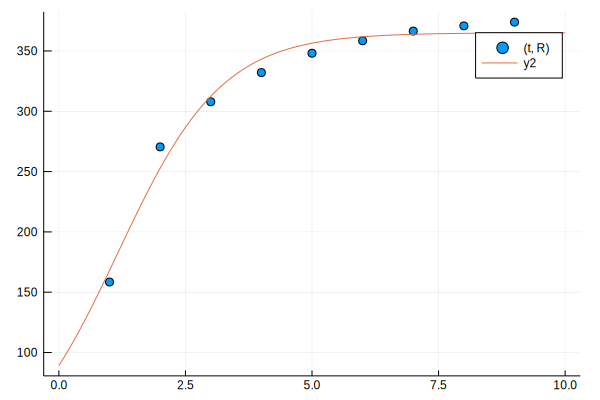

In [15]:
scatter(t, R, label = "(t, R)")
plot!(0:0.1:10, Logistic)

**Solution 7.** $\quad R(t) = \frac{365.0855422}{1 + 3.094470652e^{-0.9704199845t}}$

8. Find the rate of change $R'(t)$, and explain its meaning. Find $\underset{t \to \infty}{\lim} R'(t)$, and explain its meaning.

**Solution 8.**

$$\begin{align}
R'(t) &= \dfrac{0 - 365.0855422 \left(\frac{d}{dt} 1 + 3.094470652e^{-0.9704199845t}\right)}{\left(1 + 3.094470652e^{-0.9704199845t}\right)^2} \\
&= \dfrac{- 365.0855422 \cdot 3.094470652 \left(-0.9704199845 \cdot e^{-0.9704199845t}\right)}{\left(1 + 3.094470652e^{-0.9704199845t}\right)^2} \\
&= \dfrac{1096.3285769503539e^{-0.9704199845t}}{\left(1 + 3.094470652e^{-0.9704199845t}\right)^2} \\
\underset{t \to \infty}{\lim} R'(t) &= \dfrac{1096.3285769503539e^{-0.9704199845(\infty)}}{\left(1 + 3.094470652e^{-0.9704199845(\infty)}\right)^2} \\
&= 0
\end{align}$$

The rate of change, $R'(t)$, shows how total revenue of the Star Wars movie changed over time, according to the logistic regression equation. $\underset{t \to \infty}{\lim} R'(t) = 0$ shows that the rate of change in the total revenue slowly approaches 0.

**Verifying Solution 8.**

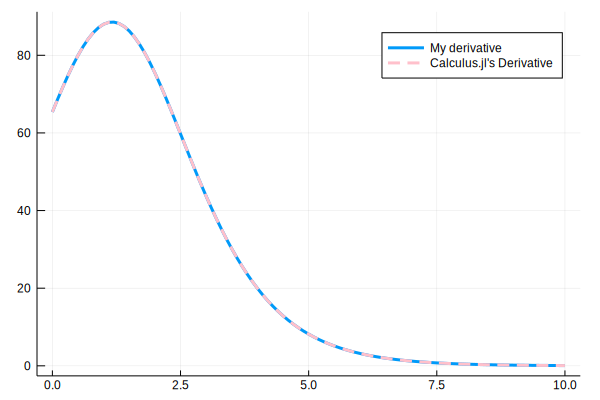

In [16]:
dR(t) = (1096.3285769503539 * exp(-0.9704199845t)) / (1 + 3.094470652 * exp(-0.9704199845t))^2 
plot(0:0.1:10, dR
    , lw = 3
    , label = "My derivative"
)
plot!(0:0.1:10, derivative(Logistic)
    , lw = 3
    , line = :dash
    , color = "pink"
    , label = "Calculus.jl's Derivative"
)

In [17]:
dR(Inf)

0.0

**Successfully verified solution 8.** The computer's results seem to align with my solution to problem 8!

9. Next, make a scatterplot of the data points $(t, G)$. Select a model for regression that you think best fits the data, and make a case for why you have chosen it. Find the domain of the function.

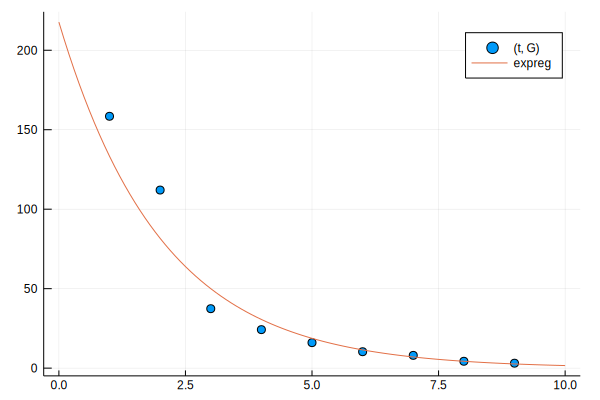

In [21]:
scatter(t, G, label = "(t, G)")

a = 217.7008246
b = 0.6124307332
ExpReg(x) = @. a * b ^ x

plot!(0:0.1:10, ExpReg, label = "ExpReg")

**Solution 9.** I chose the exponential model for regression because the gross revenue seems to rapidly decrease initially, but then slowly decrease later. The domain of the regression function would be $(-\infty, \infty)$.

10. Use the function found in Exercise 9 to predict when the distributor should begin home video sales. (See Exercise 5.)

In [22]:
find_zero(expreg, 3)

58.63516828536307

**Solution 10.** According to the exponential regression function, the distributor should begin home video sales after 58.6 weeks since the release.

---

In [24]:
# Curious George data
data = [
    1 14.70 14.70
    2 18.82 33.52
    3  9.83 43.35
    4  5.95 49.30
    5  3.28 52.58
    6  2.81 55.39
    7  1.50 56.89
]
t, G, R = data[:,1], data[:,2], data[:,3]
data

7×3 Array{Float64,2}:
 1.0  14.7   14.7 
 2.0  18.82  33.52
 3.0   9.83  43.35
 4.0   5.95  49.3 
 5.0   3.28  52.58
 6.0   2.81  55.39
 7.0   1.5   56.89

11. Make a scatterplot of the data points $(t, R)$. Does a logistic equation appear to fit the data? Why or why not?

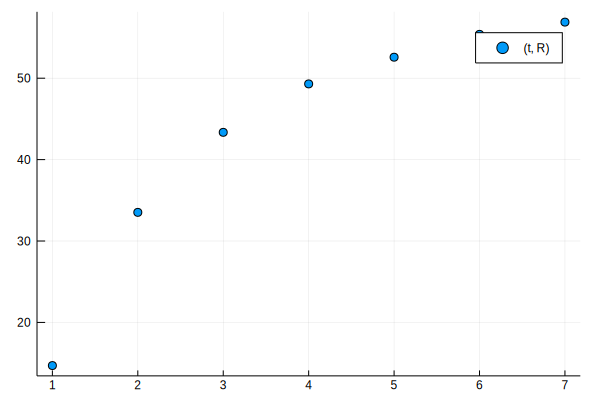

In [27]:
scatter(t, R, label = "(t, R)")

**Solution 11.** A logistic equation could possibly fit the data, however it seems like a logarithmic equation would fit better, based on appearance. Take a look at the two equations as plotted:

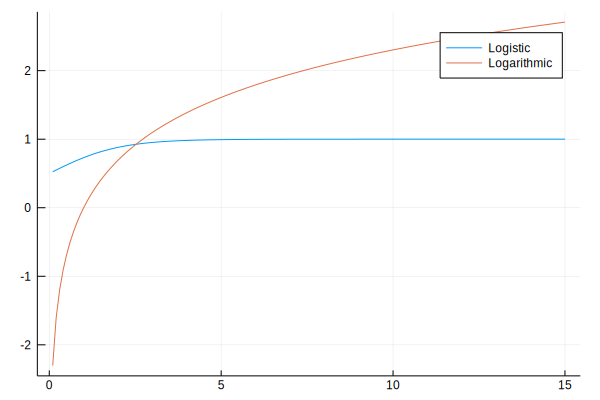

In [41]:
plot(0.1:0.1:15, x -> 1 / (1 + exp(-x)), label = "Logistic")
plot!(0.1:0.1:15, log, label = "Logarithmic")

The data seems to follow a steeper function, so considering the logarithmic function is steeper than than logistic, I can guess a logarithmic equation would fit this data better.

12. Use REGRESSION to fit a logistic function,

$\quad R(t) = \frac{c}{1 + ae^{-bt}},$

to the data.

In [26]:
a = 7.056517855
b = 1.09882897
c = 55.35852761
Logistic(x) = @. c / (1 + a * exp(-b * x))

logistic (generic function with 1 method)

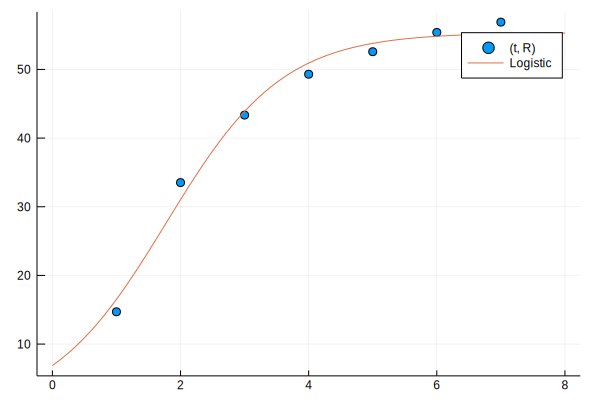

In [28]:
scatter(t, R, label = "(t, R)")
plot!(0:0.1:8, logistic, label = "Logistic")

**Solution 12.** $\quad R(t) = \frac{55.35852761}{1 + 7.056517855e^{-1.09882897t}}$

13. Find the rate of change $R'(t)$, and explain its meaning. Find $\underset{t \to \infty}{\lim} R'(t)$, and explain its meaning.

**Solution 13.**

$$\begin{align}
R'(t) &= \dfrac{0 - 55.35852761 \left(\frac{d}{dt} 1 + 7.056517855e^{-1.09882897t}\right)}{\left(1 + 7.056517855e^{-1.09882897t}\right)^2} \\
&= \dfrac{- 55.35852761 \cdot 7.056517855 \left(-1.09882897 \cdot e^{-1.09882897t}\right)}{\left(1 + 7.056517855e^{-1.09882897t}\right)^2} \\
&= \dfrac{429.24483302647883e^{-1.09882897t}}{\left(1 + 7.056517855e^{-1.09882897t}\right)^2} \\
\underset{t \to \infty}{\lim} R'(t) &= \dfrac{429.24483302647883e^{-1.09882897(\infty)}}{\left(1 + 7.056517855e^{-1.09882897(\infty)}\right)^2} \\
&= 0
\end{align}$$

The rate of change, $R'(t)$, shows how total revenue of the Curious George movie changed over time, according to the logistic regression equation. $\underset{t \to \infty}{\lim} R'(t) = 0$ shows that the rate of change in the total revenue slowly approaches 0.

14. Make a scatterplot of the data points $(t, G)$. Select a model for regression that you think best fits the data, and make a case for why you have chosen it. Find the domain of the function.

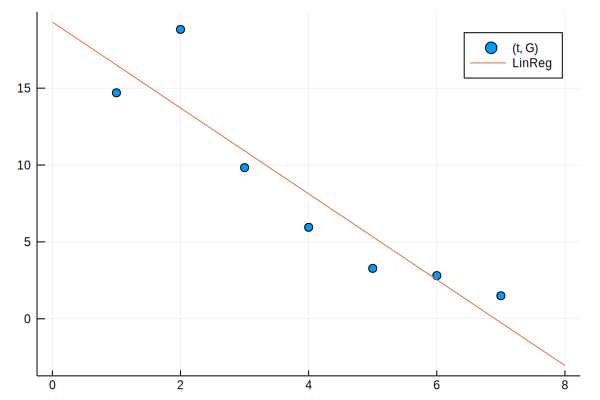

In [46]:
scatter(t, G, label = "(t, G)")

LinReg = polyfit(t, G, 1)
xs = 0:0.1:8
plot!(xs, LinReg(xs), label = "LinReg")

**Solution 14.** I would select a linear model because the data looks like it follows a line except for one outlier. The domain would be $\Bbb R$.

15. Use the function found in Exercise 14 to predict when the distributor should begin home video sales. (See Exercise 5.)

In [47]:
find_zero(LinReg, 3)

6.911091211462197

**Solution 15.** According to the linear model, the distributor should begin home video sales in 6.9 weeks.

---

In [49]:
data = [
    1 26.65 26.65
    2 24.50 51.15
    3 16.29 67.44
    4 12.30 79.74
    5 10.04 89.78
    7 8.84  98.62
    8 3.53  108.28
    9 2.31  110.59
]

t, G, R = data[:,1], data[:,2], data[:,3]
data

8×3 Array{Float64,2}:
 1.0  26.65   26.65
 2.0  24.5    51.15
 3.0  16.29   67.44
 4.0  12.3    79.74
 5.0  10.04   89.78
 7.0   8.84   98.62
 8.0   3.53  108.28
 9.0   2.31  110.59

16. Make a scatterplot of the data points $(t, R)$. Does it seem to fit a logistic equation? Why or why not?

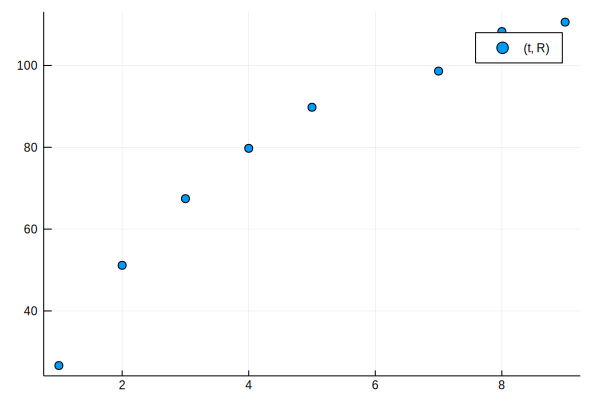

In [50]:
scatter(t, R, label = "(t, R)")

**Solution 16.** Yes, it does seem to fit a logistic equation because the data follow a path similar to a logistic equation.

17. Use REGRESSION to fit a logistic function,

$\quad R(t) = \frac{c}{1 + ae^{-bt}},$

to the data.

In [51]:
a = 4.762662697
b = 0.6354791317
c = 110.6770351
Logistic(x) = @. c / (1 + a * exp(-b * x))

Logistic (generic function with 1 method)

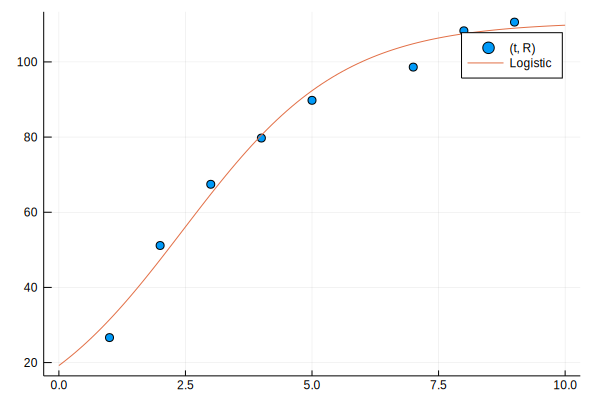

In [52]:
scatter(t, R, label = "(t, R)")
plot!(0:0.1:10, Logistic, label = "Logistic")

**Solution 17.** $\quad R(t) = \frac{110.6770351}{1 + 4.762662697e^{-0.6354791317t}}$

18. Find the rate of change $R'(t)$, and explain its meaning. Find $\underset{t \to \infty}{\lim} R'(t)$, and explain its meaning.

**Solution 18.**

$$\begin{align}
R'(t) &= \dfrac{0 - 110.6770351 \left(\frac{d}{dt} 1 + 4.762662697e^{-0.6354791317t}\right)}{\left(1 + 4.762662697e^{-0.6354791317t}\right)^2} \\
&= \dfrac{- 110.6770351 \cdot 4.762662697 \left(-0.6354791317 \cdot e^{-0.6354791317t}\right)}{\left(1 + 4.762662697e^{-0.6354791317t}\right)^2} \\
&= \dfrac{334.97209906767057e^{-0.6354791317t}}{\left(1 + 4.762662697e^{-0.6354791317t}\right)^2} \\
\underset{t \to \infty}{\lim} R'(t) &= \dfrac{334.97209906767057e^{-0.6354791317(\infty)}}{\left(1 + 4.762662697e^{-0.6354791317(\infty)}\right)^2} \\
&= 0
\end{align}$$

The rate of change, $R'(t)$, shows how total revenue of the Remember The Titans movie changed over time, according to the logistic regression equation. $\underset{t \to \infty}{\lim} R'(t) = 0$ shows that the rate of change in the total revenue slowly approaches 0.

19. Make a scatterplot of the data points $(t, G)$. Select a model for regression that you think best fits the data, and make a case for why you have chosen it. Find the domain of the function.

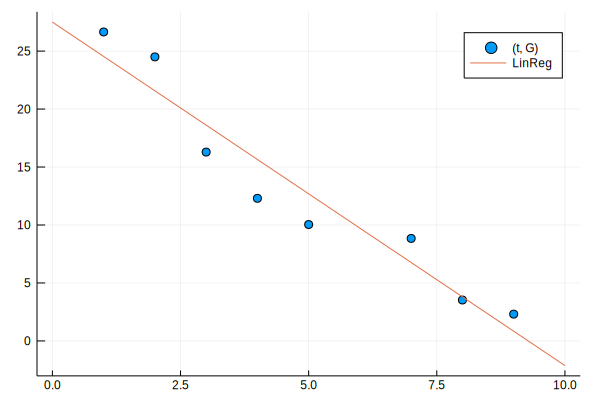

In [54]:
scatter(t, G, label = "(t, G)")
LinReg = polyfit(t, G, 1)
xs = 0:0.1:10
plot!(xs, LinReg(xs), label = "LinReg")

**Solution 19.** I would select a linear model because the data looks like it follows a line. The domain would be $\Bbb R$.

20. Use the function found in Exercise 19 to predict when the distributor should begin home video sales. (See Exercise 5.)

In [55]:
find_zero(LinReg, 3)

9.282713394968823

**Solution 20.** According to the linear model, the distributor should begin home video sales in 9.3 weeks.

21. Does a logistic function seem to fit all graphs of the data points $(t, R)$? Why do you think this happens?

**Solution 21.** Yes, a logistic function seems to fit all graphs of the data points $(t, R)$ because they all model the same situation, revenue over time.

22. What type of function best fits the data points $(t, G)$? Explain why.

**Solution 22.** A linear function best fits the data points $(t, G)$ because gross revenue generally decreases at a constant rate, with an except to highly popular movies, such as Star Wars.